In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
request_metrics_nested_booking_limit = pd.read_csv('nested_booking_limit_MMPP2/request_metrics_general_nested_booking_limit.csv')
request_metrics_sarathi = pd.read_csv('sarathi_MMPP2/request_metrics_sarathi.csv')
request_metrics_vllm = pd.read_csv('vllm_MMPP2/request_metrics_vllm.csv')

throughput_nested_booking_limit_df = pd.read_csv('nested_booking_limit_MMPP2/throughput_general_nested_booking_limit.csv')
throughput_sarathi_df = pd.read_csv('sarathi_MMPP2/throughput_sarathi.csv')
throughput_vllm_df = pd.read_csv('vllm_MMPP2/throughput_vllm.csv')

   Time (sec)  throughput
0    0.000000           0
1    0.015479           2
2    0.081939           6
3    0.094529          12
4    0.107498          20
6234 6516 9471


Text(0.5, 0, 'Time')

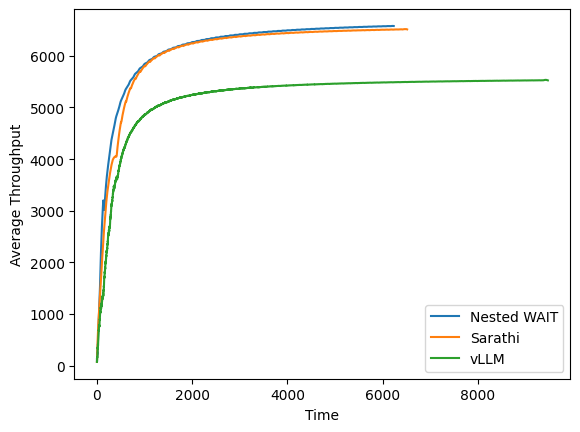

In [3]:
print(throughput_nested_booking_limit_df.head())

throughput_nested_booking_limit_col1 = throughput_nested_booking_limit_df['Time (sec)']
throughput_nested_booking_limit_col2 = throughput_nested_booking_limit_df['throughput']
throughput_sarathi_col1 = throughput_sarathi_df['Time (sec)']
throughput_sarathi_col2 = throughput_sarathi_df['throughput']
throughput_vllm_col1 = throughput_vllm_df['Time (sec)']
throughput_vllm_col2 = throughput_vllm_df['throughput']

print(len(throughput_nested_booking_limit_col1), len(throughput_sarathi_col1), len(throughput_vllm_col1))

avg_throughput_nested_booking_limit = throughput_nested_booking_limit_col2/throughput_nested_booking_limit_col1
avg_throughput_sarathi = throughput_sarathi_col2/throughput_sarathi_col1
avg_throughput_vllm = throughput_vllm_col2/throughput_vllm_col1

plt.plot(avg_throughput_nested_booking_limit, label = "Nested WAIT")
plt.plot(avg_throughput_sarathi, label = "Sarathi")
plt.plot(avg_throughput_vllm, label = "vLLM")
plt.legend()
plt.ylabel("Average Throughput")
plt.xlabel("Time")

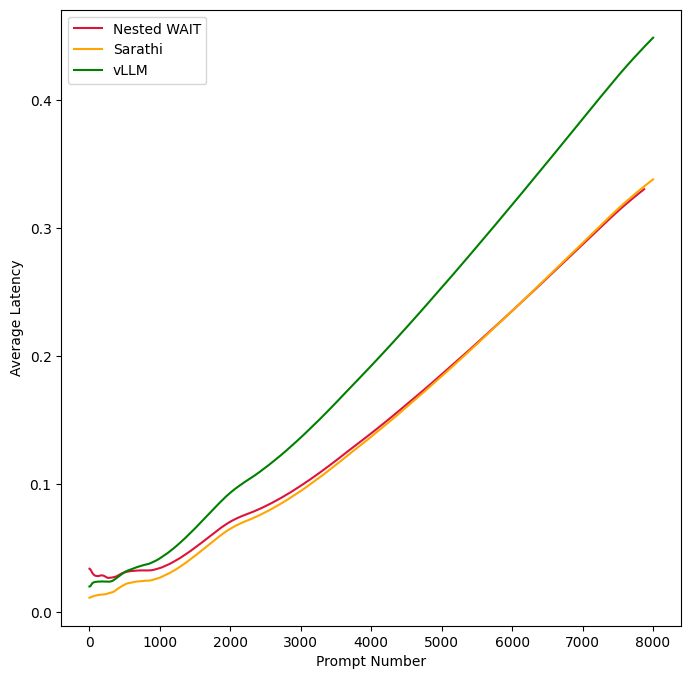

In [4]:
def avg_latency(arr):
    for i in range(len(arr)):
        arr[i]/=(i+1)
    return arr

e2e_time_nested_booking_limit = avg_latency(np.cumsum(request_metrics_nested_booking_limit['request_e2e_time_normalized']))
e2e_time_sarathi = avg_latency(np.cumsum(request_metrics_sarathi['request_e2e_time_normalized']))
e2e_time_vllm = avg_latency(np.cumsum(request_metrics_vllm['request_e2e_time_normalized']))

plt.figure(figsize=(8,8))
plt.xlabel("Prompt Number")
plt.ylabel("Average Latency")
plt.plot(e2e_time_nested_booking_limit, label = "Nested WAIT", color = 'crimson')
plt.plot(e2e_time_sarathi, label = "Sarathi", color = 'orange')
plt.plot(e2e_time_vllm, label = "vLLM", color= 'green')
plt.legend()